In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('df.csv')

In [7]:
df.head()

,Name,Mobile Number,Email Address,EngagementScore,Company,Age,MaritalStatus,gender,Exp,Interested,department,City
0,Vijay,919959739997,sekharvij@gmail.com,89.0,Deloitte,24.0,Single,Male,4,Yes,IT,Bangalore
1,Ravindran Nagappan,919840107227,ravi.cti2000@gmail.com,93.0,Microsoft,30.0,Single,Male,14,No,Marketing,Tinsukia
2,Rohit,918408951853,rohitchouhan1119@gmail.com,89.0,CapGemini,30.0,Single,Male,11,Yes,DataBase,Coimbatore
3,Pramod Singh,918586886645,askpramodsingh@gmail.com,55.0,Amazon,50.0,Single,Female,15,No,HumanResources,Ghaziabad
4,Ajay Thakur,917666052926,ajay.thakur244@gmail.com,6.0,Gislen Software,54.0,Married,Female,1,No,Other,Indore


In [8]:
df.department.value_counts()

IT                          252
DataBase                    152
Finance                     135
Other                       118
Operations                  111
Sales                       110
HumanResources              109
Marketing                   107
Research and Development    102
Name: department, dtype: int64

In [9]:
df = df.rename(columns={'Name': 'name','Mobile Number':'mobile_number','Email Address': 'email_address','EngagementScore':'engagement_score','Company' : 'company','Age':'age','MaritalStatus':'marital_status','gender':'gender','Exp' :'experience','Interested':'interested','department':'department','City':'city'})

In [10]:
import matplotlib.pyplot as plt

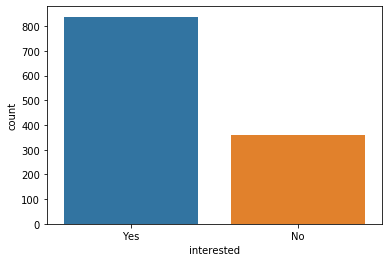

In [11]:
ax = sns.countplot(df["interested"], label="count")

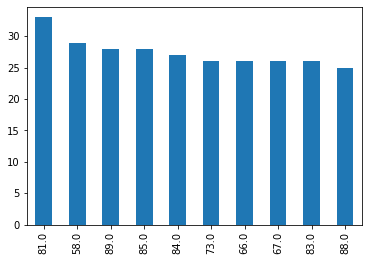

In [12]:
df['engagement_score'].value_counts().head(10).plot.bar()

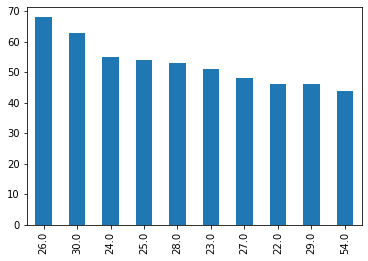

In [13]:
df['age'].value_counts().head(10).plot.bar()

In [14]:
interested_map = {'Yes': 1, 'No': 0 }
df['interested'] = df['interested'].map(interested_map)

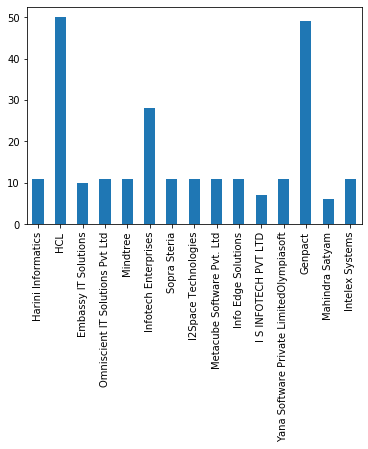

In [15]:
df['company'].value_counts().sample(15).plot.bar()

In [16]:
df.head()

,name,mobile_number,email_address,engagement_score,company,age,marital_status,gender,experience,interested,department,city
0,Vijay,919959739997,sekharvij@gmail.com,89.0,Deloitte,24.0,Single,Male,4,1,IT,Bangalore
1,Ravindran Nagappan,919840107227,ravi.cti2000@gmail.com,93.0,Microsoft,30.0,Single,Male,14,0,Marketing,Tinsukia
2,Rohit,918408951853,rohitchouhan1119@gmail.com,89.0,CapGemini,30.0,Single,Male,11,1,DataBase,Coimbatore
3,Pramod Singh,918586886645,askpramodsingh@gmail.com,55.0,Amazon,50.0,Single,Female,15,0,HumanResources,Ghaziabad
4,Ajay Thakur,917666052926,ajay.thakur244@gmail.com,6.0,Gislen Software,54.0,Married,Female,1,0,Other,Indore


### Dropping unnecessary columns

In [17]:
df = df.drop(['name','mobile_number', 'email_address'], axis =1)

In [18]:
df.columns

Index(['engagement_score', 'company', 'age', 'marital_status', 'gender',
       'experience', 'interested', 'department', 'city'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 9 columns):
engagement_score    1196 non-null float64
company             1196 non-null object
age                 1196 non-null float64
marital_status      1196 non-null object
gender              1196 non-null object
experience          1196 non-null int64
interested          1196 non-null int64
department          1196 non-null object
city                1196 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 84.2+ KB


In [20]:
df.head()

,engagement_score,company,age,marital_status,gender,experience,interested,department,city
0,89.0,Deloitte,24.0,Single,Male,4,1,IT,Bangalore
1,93.0,Microsoft,30.0,Single,Male,14,0,Marketing,Tinsukia
2,89.0,CapGemini,30.0,Single,Male,11,1,DataBase,Coimbatore
3,55.0,Amazon,50.0,Single,Female,15,0,HumanResources,Ghaziabad
4,6.0,Gislen Software,54.0,Married,Female,1,0,Other,Indore


### Introducing a new variable to turn company into numerical variable

In [21]:
df["company_size"] = None

In [22]:
Mnc =  ['Google','Microsoft','TCS','CTS','Wipro','Tech Mahindra','Infosys','Accenture','HCL','Deloitte','IBM','Amazon','CapGemini','Genpact']

small_companies = ['VeServ','Eclature Technologies','Harini Informatics','Info Edge Solutions',\
                'Hi Caliber IT Solutions','Brio Technologies Private Limited','I2Space Technologies', \
                   'Jaro Education','Omniscient IT Solutions Pvt Ltd','Esalemedia','Askmeguru',\
                   'Metacube Software Pvt. Ltd','Accuracy','Mindtree','IntelloLabs','Intelex Systems'\
                   ,'Sopra Steria','IBrand Solutions','Team Embedded','Cravaka Info Systems','Brihaspathi Technologies'\
                  'MBR Informatics','Impecsoft Solutions','Innvectra Softech','Yana Software Private Limited'\
                  'Olympiasoft','Techno Brain Ltd','Software Solutions','EON Technologies','Rapidsoft Technologies Pvt Ltd',\
                  'Toshiba Software India Pvt ltd', 'Embassy IT Solutions']
small_companies2 =  ['Gayatri Software Services Pvt Ltd','Sonata Software Limited', 'Deforay Technologies Pvt. Ltd',\
                     'ZOVIL TECHNOLOGIES', 'Aspire Software Solutions','Pramati Technologies','Hakuna Matata Solutions',\
                     'Prodapt Solutions Pvt Ltd','I S INFOTECH PVT LTD','Gislen Software','OG Software Solutions India Pvt Ltd',\
                     'CA Technologies','Infotech Enterprises','Persistent Systems','Mahindra Satyam']

small = small_companies + small_companies2

In [23]:
for i in range(df.shape[0]):
    if df.iloc[i,1] in Mnc:
        df.iloc[i,9] = 1
    elif df.iloc[i,1] in small:
        df.iloc[i,9] = 0

In [24]:
df.head()

,engagement_score,company,age,marital_status,gender,experience,interested,department,city,company_size
0,89.0,Deloitte,24.0,Single,Male,4,1,IT,Bangalore,1
1,93.0,Microsoft,30.0,Single,Male,14,0,Marketing,Tinsukia,1
2,89.0,CapGemini,30.0,Single,Male,11,1,DataBase,Coimbatore,1
3,55.0,Amazon,50.0,Single,Female,15,0,HumanResources,Ghaziabad,1
4,6.0,Gislen Software,54.0,Married,Female,1,0,Other,Indore,0


In [25]:
df = df.drop('company', axis = 1)

In [26]:
df.head()

,engagement_score,age,marital_status,gender,experience,interested,department,city,company_size
0,89.0,24.0,Single,Male,4,1,IT,Bangalore,1
1,93.0,30.0,Single,Male,14,0,Marketing,Tinsukia,1
2,89.0,30.0,Single,Male,11,1,DataBase,Coimbatore,1
3,55.0,50.0,Single,Female,15,0,HumanResources,Ghaziabad,1
4,6.0,54.0,Married,Female,1,0,Other,Indore,0


In [27]:
df.sample(5)

,engagement_score,age,marital_status,gender,experience,interested,department,city,company_size
902,68.0,31.0,Married,Female,13,1,DataBase,Chennai,0
1108,25.0,40.0,Married,Female,2,0,Finance,Jodhpur,0
429,60.0,33.0,Married,Female,12,1,Marketing,Nasik,0
371,43.0,49.0,Single,Male,16,0,Operations,Amritsar,1
421,53.0,38.0,Single,Male,18,1,IT,Bangalore,1


In [28]:
gender_map = {'Male': 1, 'Female': 0 }
df['gender'] = df['gender'].map(gender_map)

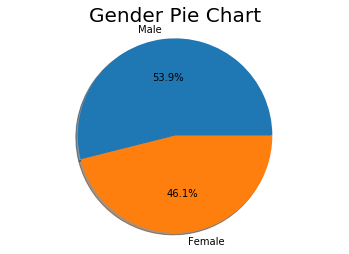

In [29]:
# pie chart
labels = ['Male', 'Female']
sizes = [df['gender'].value_counts()[1],
      df['gender'].value_counts()[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Gender Pie Chart', fontsize=20)
plt.show()

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


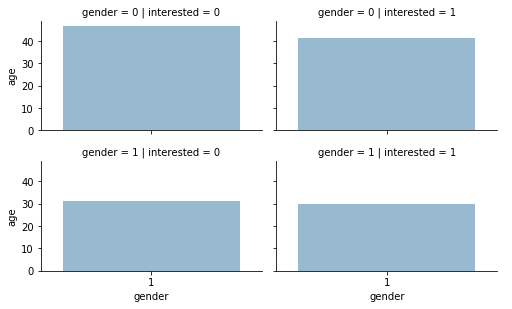

In [30]:
grid = sns.FacetGrid(df, row='gender', col='interested', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'gender', 'age', alpha=.5, ci=None)
grid.add_legend()


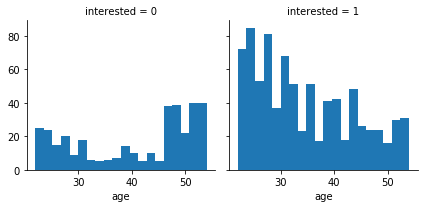

In [31]:
g = sns.FacetGrid(df, col='interested')
g.map(plt.hist, 'age', bins = 20)


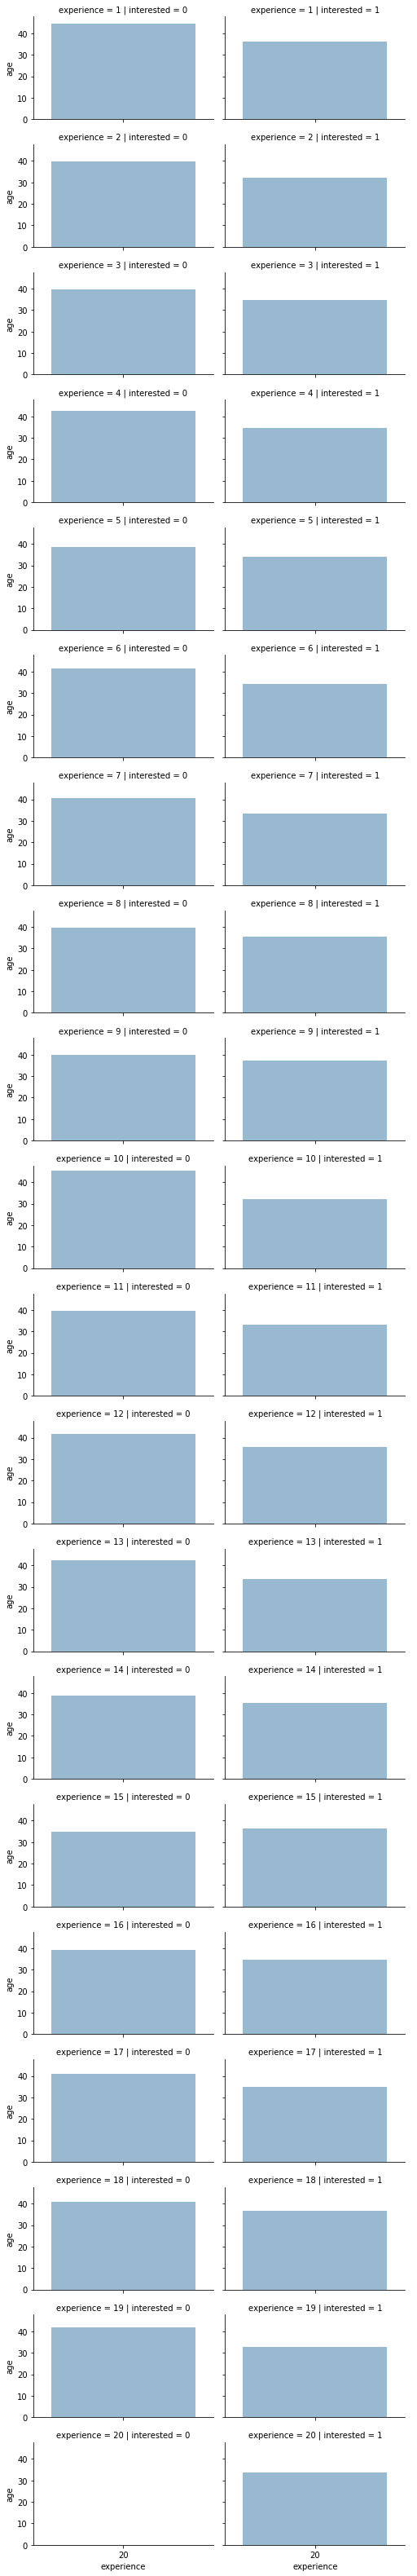

In [32]:
grid = sns.FacetGrid(df, row='experience', col='interested', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'experience', 'age', alpha=.5, ci=None)
grid.add_legend()


In [33]:
marital_map = {'Single': 1, 'Married': 0 }
df['marital_status'] = df['marital_status'].map(marital_map)

In [34]:
df = df.sample(frac=1).reset_index(drop=True)

In [35]:
df.head()

,engagement_score,age,marital_status,gender,experience,interested,department,city,company_size
0,62.0,30.0,1,1,15,1,Operations,Tinsukia,1
1,77.0,45.0,1,1,15,1,DataBase,Pondicherry,1
2,73.0,29.0,1,1,16,1,Operations,Silchar,1
3,75.0,46.0,0,0,19,0,HumanResources,Indore,0
4,71.0,29.0,1,1,3,1,Finance,Srinagar,1


In [36]:
df.isnull().sum()

engagement_score    0
age                 0
marital_status      0
gender              0
experience          0
interested          0
department          0
city                0
company_size        0
dtype: int64

In [37]:
df.department.nunique()

9

In [38]:
South = ['Bangalore','Mysore','Chennai','Pondicherry',\
         'Madurai','kochi', 'Coimbatore','Hyderabad',' Thiruvananthapuram']

North = ['Delhi','Gurgaon',\
         'Faridabad','Lucknow','Meerut','Chandigarh','Srinagar',\
         'Ludhiana','kanpur','Varanasi','Amritsar','Aligarh','Jalandhar',\
         'Ghaziabad','Moradabad','Bareilly','Agra','Gwalior',\
         'Jabalpur','Jodhpur','Kota','Srinagar','Patna','Bhopal','Indore']

East = ['Patna','Allahabad','Darjeeling',\
        'Bhubaneshwar','Gangtok','Kohima','Tezpur','Dhubri',\
        'Tinsukia','Nagaon','Jorhat','Silchar','Imphal','Aizwal',\
        'Shillong','Dimapur','Guwuhati','Agartala']

West = ['Ahemdabad','Goa','Bhopal','Aurangabad',\
        'Lonavala','Mahabaleshwar','Mumbai','Nagpur','Nasik',\
        'Surat','Solapur','Thane','Pachmarhi','Rajkot','Satara']

In [39]:
df.head()

,engagement_score,age,marital_status,gender,experience,interested,department,city,company_size
0,62.0,30.0,1,1,15,1,Operations,Tinsukia,1
1,77.0,45.0,1,1,15,1,DataBase,Pondicherry,1
2,73.0,29.0,1,1,16,1,Operations,Silchar,1
3,75.0,46.0,0,0,19,0,HumanResources,Indore,0
4,71.0,29.0,1,1,3,1,Finance,Srinagar,1


In [40]:
df.shape

(1196, 9)

In [41]:
df.columns

Index(['engagement_score', 'age', 'marital_status', 'gender', 'experience',
       'interested', 'department', 'city', 'company_size'],
      dtype='object')

In [42]:
df['zone'] = None

In [43]:
df.iloc[10,7] in South

True

In [44]:
for i in range(df.shape[0]):
    if df.iloc[i,7] in South:
        df.iloc[i,9] = 'South'
    
    elif df.iloc[i,7] in North:
        df.iloc[i,9] = 'North'
        
    elif df.iloc[i,7] in East:
        df.iloc[i,9] = 'East'
        
    elif df.iloc[i,7] in West:
        df.iloc[i,9] = 'West'
        

In [45]:
df.head()

,engagement_score,age,marital_status,gender,experience,interested,department,city,company_size,zone
0,62.0,30.0,1,1,15,1,Operations,Tinsukia,1,East
1,77.0,45.0,1,1,15,1,DataBase,Pondicherry,1,South
2,73.0,29.0,1,1,16,1,Operations,Silchar,1,East
3,75.0,46.0,0,0,19,0,HumanResources,Indore,0,North
4,71.0,29.0,1,1,3,1,Finance,Srinagar,1,North


In [46]:
df.drop('city',axis = 1, inplace = True)

In [47]:
df.head()

,engagement_score,age,marital_status,gender,experience,interested,department,company_size,zone
0,62.0,30.0,1,1,15,1,Operations,1,East
1,77.0,45.0,1,1,15,1,DataBase,1,South
2,73.0,29.0,1,1,16,1,Operations,1,East
3,75.0,46.0,0,0,19,0,HumanResources,0,North
4,71.0,29.0,1,1,3,1,Finance,1,North


In [48]:
df = pd.get_dummies(df)

In [49]:
df.shape

(1196, 20)

### Applying SMOTE 


In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


# Separate input features and target
x = df.drop("interested", axis=1)
y = df["interested"]

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [51]:
smote = LogisticRegression(solver='liblinear').fit(x_train, y_train)

smote_pred = smote.predict(x_test)


In [52]:
accuracy_score(y_test, smote_pred)

0.959866220735786

In [53]:
# f1 score
f1_score(y_test, smote_pred)
    


0.9702970297029702

In [54]:

recall_score(y_test, smote_pred)

0.9607843137254902

### Without using SMOTE

In [55]:
x = df.drop("interested", axis=1)
y = df["interested"]


In [56]:
x.shape

(1196, 19)

In [57]:
y.shape

(1196,)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.head()

,engagement_score,age,marital_status,gender,experience,company_size,department_DataBase,department_Finance,department_HumanResources,department_IT,department_Marketing,department_Operations,department_Other,department_Research and Development,department_Sales,zone_East,zone_North,zone_South,zone_West
992,54.0,24.0,1,1,6,1,0,0,0,0,0,0,1,0,0,0,0,1,0
203,85.0,28.0,1,1,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1010,66.0,41.0,0,0,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0
45,35.0,39.0,1,0,11,1,0,0,1,0,0,0,0,0,0,0,1,0,0
755,55.0,52.0,0,0,19,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [60]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

acc_log

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


94.38

In [61]:
# Support Vector Machines

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

c:\users\ananta arora\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


94.98

In [62]:
 # KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train) * 100, 2)
acc_knn

89.96

In [63]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)
acc_perceptron

79.09

In [64]:
x_train.head()

,engagement_score,age,marital_status,gender,experience,company_size,department_DataBase,department_Finance,department_HumanResources,department_IT,department_Marketing,department_Operations,department_Other,department_Research and Development,department_Sales,zone_East,zone_North,zone_South,zone_West
992,54.0,24.0,1,1,6,1,0,0,0,0,0,0,1,0,0,0,0,1,0
203,85.0,28.0,1,1,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1010,66.0,41.0,0,0,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0
45,35.0,39.0,1,0,11,1,0,0,1,0,0,0,0,0,0,0,1,0,0
755,55.0,52.0,0,0,19,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [65]:
# Decision Tree

decision_tree = DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

87.81

In [66]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1, class_weight='balanced')
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

97.85

In [67]:
x_test.head()

,engagement_score,age,marital_status,gender,experience,company_size,department_DataBase,department_Finance,department_HumanResources,department_IT,department_Marketing,department_Operations,department_Other,department_Research and Development,department_Sales,zone_East,zone_North,zone_South,zone_West
603,45.0,38.0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1033,35.0,22.0,1,1,17,0,0,0,0,0,0,0,0,0,1,0,0,1,0
572,72.0,31.0,0,0,18,0,0,0,0,0,0,1,0,0,0,1,0,0,0
43,91.0,29.0,1,1,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1114,81.0,28.0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [68]:
di_df = pd.DataFrame({'engagement_score':[60], 'company':['Google'], 'age':[34], 'marital_status':['Single'], 'gender':['Female'],
      'experience':[6], 'department':['IT'], 'city':['Hyderabad']})

di_df

,engagement_score,company,age,marital_status,gender,experience,department,city
0,60,Google,34,Single,Female,6,IT,Hyderabad


In [69]:
Mnc =  ['Google','Microsoft','TCS','CTS','Wipro','Tech Mahindra','Infosys','Accenture','HCL','Deloitte','IBM','Amazon','CapGemini','Genpact']

small_companies = ['VeServ','Eclature Technologies','Harini Informatics','Info Edge Solutions',\
                'Hi Caliber IT Solutions','Brio Technologies Private Limited','I2Space Technologies', \
                   'Jaro Education','Omniscient IT Solutions Pvt Ltd','Esalemedia','Askmeguru',\
                   'Metacube Software Pvt. Ltd','Accuracy','Mindtree','IntelloLabs','Intelex Systems'\
                   ,'Sopra Steria','IBrand Solutions','Team Embedded','Cravaka Info Systems','Brihaspathi Technologies'\
                  'MBR Informatics','Impecsoft Solutions','Innvectra Softech','Yana Software Private Limited'\
                  'Olympiasoft','Techno Brain Ltd','Software Solutions','EON Technologies','Rapidsoft Technologies Pvt Ltd',\
                  'Toshiba Software India Pvt ltd', 'Embassy IT Solutions']
small_companies2 =  ['Gayatri Software Services Pvt Ltd','Sonata Software Limited', 'Deforay Technologies Pvt. Ltd',\
                     'ZOVIL TECHNOLOGIES', 'Aspire Software Solutions','Pramati Technologies','Hakuna Matata Solutions',\
                     'Prodapt Solutions Pvt Ltd','I S INFOTECH PVT LTD','Gislen Software','OG Software Solutions India Pvt Ltd',\
                     'CA Technologies','Infotech Enterprises','Persistent Systems','Mahindra Satyam']

small = small_companies + small_companies2

#----------------------------------------------------------------

South = ['Bangalore','Mysore','Chennai','Pondicherry',\
         'Madurai','kochi', 'Coimbatore','Hyderabad',' Thiruvananthapuram']

North = ['Delhi','Gurgaon',\
         'Faridabad','Lucknow','Meerut','Chandigarh','Srinagar',\
         'Ludhiana','kanpur','Varanasi','Amritsar','Aligarh','Jalandhar',\
         'Ghaziabad','Moradabad','Bareilly','Agra','Gwalior',\
         'Jabalpur','Jodhpur','Kota','Srinagar','Patna','Bhopal','Indore']

East = ['Patna','Allahabad','Darjeeling',\
        'Bhubaneshwar','Gangtok','Kohima','Tezpur','Dhubri',\
        'Tinsukia','Nagaon','Jorhat','Silchar','Imphal','Aizwal',\
        'Shillong','Dimapur','Guwuhati','Agartala']

West = ['Ahemdabad','Goa','Bhopal','Aurangabad',\
        'Lonavala','Mahabaleshwar','Mumbai','Nagpur','Nasik',\
        'Surat','Solapur','Thane','Pachmarhi','Rajkot','Satara']


#----------------------------------------------------------------------

df_predict = pd.DataFrame(np.zeros(19).reshape(-1,19),columns = ['engagement_score', 'age', 'marital_status', 'gender', 'experience',
       'company_size', 'department_DataBase', 'department_Finance',
       'department_HumanResources', 'department_IT', 'department_Marketing',
       'department_Operations', 'department_Other',
       'department_Research and Development', 'department_Sales', 'zone_East',
       'zone_North', 'zone_South', 'zone_West'] )

df_predict.engagement_score = di_df.engagement_score[0]
df_predict.age = di_df.age[0]

if di_df.marital_status[0] == 'Single':
    df_predict.marital_status = 1
else:
    df_predict.marital_status = 0
    
    
if di_df.gender[0] == 'Male':
    df_predict.gender = 1
else:
    df_predict.gender = 0
    
df_predict.experience = di_df.experience[0]

if di_df.company[0] in Mnc:
    df_predict.company_size = 1
else:
    df_predict.comapny_size = 0


if di_df.department[0] == 'DataBase':
    df_predict.department_DataBase = 1
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 0
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 0
    df_predict.department_Other = 0
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 0
    
elif di_df.department[0] == 'Finance':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 1
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 0
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 0
    df_predict.department_Other = 0
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 0
    
elif di_df.department[0] == 'HumanResources':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 1
    df_predict.department_IT = 0
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 0
    df_predict.department_Other = 0
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 0
    
    
elif di_df.department[0] == 'IT':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 1
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 0
    df_predict.department_Other = 0
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 0
    
elif di_df.department[0] == 'Marketing':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 0
    df_predict.department_Marketing = 1
    df_predict.department_Operations = 0
    df_predict.department_Other = 0
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 0
    
elif di_df.department[0] == 'Operations':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 0
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 1
    df_predict.department_Other = 0
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 0
    
elif di_df.department[0] == 'Other':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 0
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 0
    df_predict.department_Other = 1
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 0
    
elif di_df.department[0] == 'Sales':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 0
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 0
    df_predict.department_Other = 0
    df_predict.department_Sales = 1
    df_predict['department_Research and Development'] = 0
    
elif di_df.department[0] == 'Research and Development':
    df_predict.department_DataBase = 0
    df_predict.department_Finance = 0
    df_predict.department_HumanResources = 0
    df_predict.department_IT = 0
    df_predict.department_Marketing = 0
    df_predict.department_Operations = 0
    df_predict.department_Other = 0
    df_predict.department_Sales = 0
    df_predict['department_Research and Development'] = 1
    
if di_df.city[0] in South:
    df_predict.zone_South = 1
    df_predict.zone_East = 0
    df_predict.zone_North = 0
    df_predict.zone_West = 0
    
elif di_df.city[0] in East:
    df_predict.zone_South = 0
    df_predict.zone_East = 1
    df_predict.zone_North = 0
    df_predict.zone_West = 0
    
elif di_df.city[0] in North:
    df_predict.zone_South = 0
    df_predict.zone_East = 0
    df_predict.zone_North = 1
    df_predict.zone_West = 0
    
elif di_df.city[0] in West:
    df_predict.zone_South = 0
    df_predict.zone_East = 0
    df_predict.zone_North = 0
    df_predict.zone_West = 1
else:
    df_predict.zone_South = 1
    df_predict.zone_East = 0
    df_predict.zone_North = 0
    df_predict.zone_West = 0

In [70]:
df_predict

,engagement_score,age,marital_status,gender,experience,company_size,department_DataBase,department_Finance,department_HumanResources,department_IT,department_Marketing,department_Operations,department_Other,department_Research and Development,department_Sales,zone_East,zone_North,zone_South,zone_West
0,60,34,1,0,6,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [71]:
random_forest.predict(df_predict)

array([0], dtype=int64)

In [72]:
import pickle
filename = 'ml_model'
pickle.dump(random_forest, open(filename, 'wb'))